In [ ]:
#Import modules 
import time as T
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import torch
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

#Go to the parent folder AI II FINAL CODE as main path 
try: 
    import os
    if str(os.getcwd())[-16:] != "AI II FINAL CODE": 
        os.chdir('../../AI II FINAL CODE/')
except:
    pass 

In [14]:
#Get current path 
#os.getcwd()

Gradient function is correct


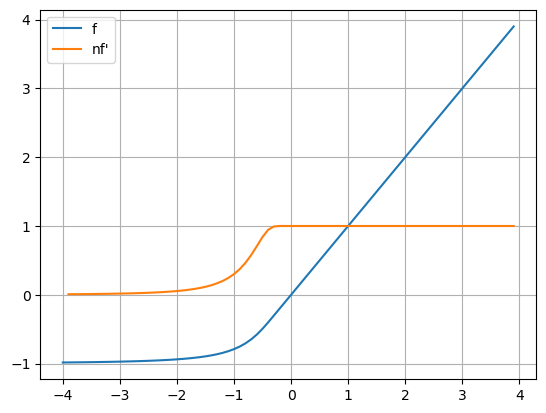

Using device: cuda


In [15]:
#Import local modules 
%run CurrentCode/Model2.ipynb
%run CurrentCode/actFunctions2.ipynb
%run CurrentCode/DeviceDataLoader2.ipynb

In [16]:
trialsPerExperiment = 5
#choose random seeds for trials 
seeds = [62337, 12341, 13424, 43124, 1413431, 1341, 132, 1765, 98786, 5634]

LR = [0.2, 0.1, 0.05, 0.01, 0.005]

actFuncList = [nn.ReLU, nn.GELU, squarePlus,  nn.Softplus, erfRelu, erfPlus] 
actFuncList_str = ['relu', 'gelu', 'squarplus', 'softplus','erfrelu', 'erfplus'] 
histories = [] 


In [ ]:
totTime0 = T.time() 
for ii in range(trialsPerExperiment): 
    SEED = np.random.randint(1,99999)
    batches = []
    for actFunc_num in range(len(actFuncList)):
        torch.manual_seed(SEED)
        history = []
        t0 = T.time()
        #Make the model with the respective params and put it into your GPU/CPU device 
        model = ResNet(block=ResidualBlock, img_input_dim=28, layers=50, actFunc=actFuncList[actFunc_num])
        to_device(model, device)
        
        #Fit the model 
        for jj in range(len(LR)):
            history += model.fit(epochs=5, lr=LR[jj], mo=0.1, train_loader=train_loader, val_loader=val_loader, print_statement=False)
        
        print(f'Trial: {ii+1} Time (s): {T.time-t0:.3f} AF: {str(actFuncList_str[actFunc_num])}')
        
        batches.append(history)
        
    histories.append(batches)
    
totTime1 = T.time()

print(f"Experiment run time: {((totTime1-totTime0)/60):.3f} mins") 

KeyboardInterrupt: 

In [ ]:
try: 
    hist_data = loadObject('Results/Experiment1_pkl')
    
    uploadObject(histories + hist_data, 'Results/Experiment1_pkl', nosilence=True)
except:
    uploadObject(histories, 'Results/Experiment1_pkl', nosilence=True)
    

Time: 0.00100 s

